In [1]:
import numpy as np
import scipy

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme()

## Генерация выборки

In [33]:
selection = np.random.exponential(size=25)
# selection = [21, 28, 2, 10, 25, 19, 6, 13, 8, 12]
sorted_selection = np.sort(selection)  # вариационный ряд

## Поиск моды, медианы, размаха

In [34]:
def find_modes(selection_: np.array) -> np.array:
    count = {}
    for value in selection_:
        count[value] = count.get(value, 0) + 1

    if len(set(count.values())) == 1:
        return selection
    else:
        max_count = max(count.values())
        modes = []
        for value in count.keys():
            if count[value] == max_count:
                modes.append(value)
        return np.array(modes)


modes = find_modes(selection)  # моды
median = np.median(selection) # медиана
scope = sorted_selection[-1] - sorted_selection[0]  # размах
asymmetry_coefficient = scipy.stats.skew(selection)  # коэффициент ассиметрии

In [35]:
print("Мода: ", modes)
print("Медиана: ", median)
print("Размах: ", scope)
print("Коэффициент ассиметрии: ", asymmetry_coefficient)

Мода:  [0.60139115 0.42643061 0.329805   0.0217973  1.62710754 1.42161038
 0.32308919 0.33893313 0.59754796 0.30089322 0.58674531 0.82802004
 0.3376556  3.18496505 0.20332102 1.47723639 2.37048675 0.78341424
 2.2149317  1.73753484 0.12672637 0.12371888 2.26170989 0.93740579
 1.95292008]
Медиана:  0.6013911453705519
Размах:  3.163167749800872
Коэффициент ассиметрии:  0.8669153653844422


## Эмпирическая функция распределения

<Axes: ylabel='Proportion'>

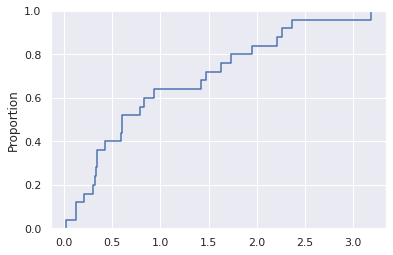

In [36]:
fig, ax = plt.subplots()
sns.ecdfplot(x=selection, ax=ax)

## Гистограмма и boxplot

<Axes: ylabel='Count'>

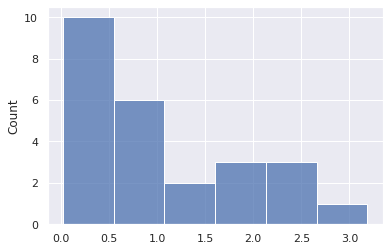

In [37]:
sns.histplot(x=selection)

<Axes: >

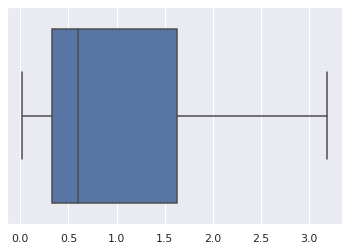

In [38]:
sns.boxplot(x=selection)

## Bootstrap метод

Для 1000 элементов bootstrap метод показал себя неплохо, но иногда было что-то странное, поэтому у меня не 1000, а 10000 выборок

In [39]:
bootstrap_selections = np.array([
    np.random.choice(selection, 25) for _ in range(10000)
])

In [40]:
def averages_density(x):
    return 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * ((x - 1) / 0.2) ** 2)

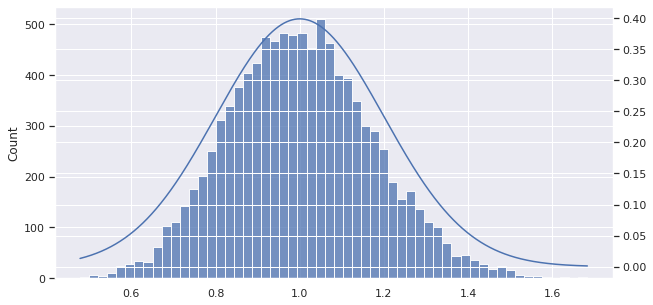

In [41]:
bootstrap_selections_averages = np.array([np.average(array) for array in bootstrap_selections])

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()

x = np.linspace(np.min(bootstrap_selections_averages), np.max(bootstrap_selections_averages), 100000)
y = averages_density(x)

sns.histplot(x=bootstrap_selections_averages, ax=ax1)
sns.lineplot(x=x, y=y, ax=ax2)

plt.show()

<Axes: ylabel='Count'>

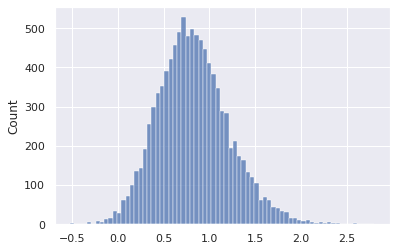

In [42]:
bootstrap_selections_skews = np.array([scipy.stats.skew(array) for array in bootstrap_selections])
sns.histplot(x=bootstrap_selections_skews)

In [43]:
def median_density(x):
    return 67603900 * (1 - np.exp(-x)) ** 12 * (np.exp(-x)) ** 13

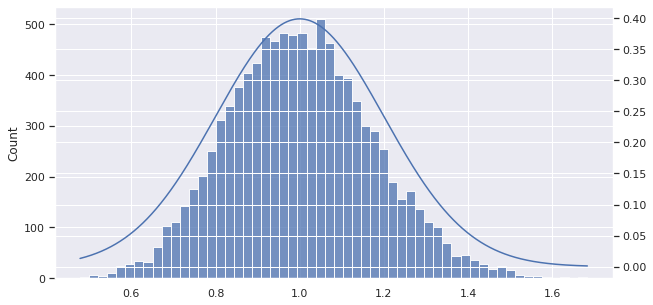

In [44]:
bootstrap_selections_median = np.array([np.median(array) for array in bootstrap_selections])

fig_s = plt.figure(figsize=(10, 5))
ax1_s = fig_s.add_subplot(111)
ax2_s = ax1_s.twinx()

x_s = np.linspace(np.min(bootstrap_selections_median), np.max(bootstrap_selections_median), 1000)
y_s = median_density(x)

sns.histplot(x=bootstrap_selections_averages, ax=ax1_s)
sns.lineplot(x=x, y=y, ax=ax2_s)

plt.show()